# The Spark Foundation

DATA SCIENCE AND BUSINESS ANALYTICS INTERN

NAME : ANIKET KANDARA

TASK 2 : PREDICTION USING UNSUPERVISED LEARNING

Problem Statement : Predict the optimum number of clusters and represent it visually.

In [1]:
# Importing all the necessary librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets  # sklearn dataset is a packaged dataset

In [2]:
# Loading the iris dataset into a dataframe

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
# Cheking whether the correct dataset is loaded or not by watching the first 5 rows

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Checking the dimensions od the dataframe

iris_df.shape

(150, 4)

In [5]:
# Assigning the values to a variables for algorithm

x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# To find the optimum number of clusters we will use K-Means Clustering Algorithm

from sklearn.cluster import KMeans

In [8]:
# For creating a clusters we need to find the distance between the points

distance = []

In [9]:
# But there can be any number of clusters so we need to check inertia for every value of 'k'.

for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    distance.append(kmeans.inertia_)

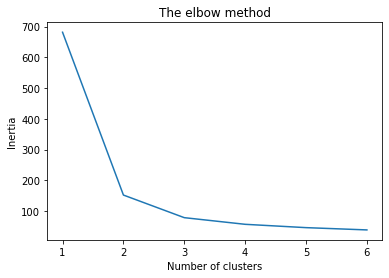

In [10]:
# Using elbow method we can find the optimum value of 'k'
# But we have to plot the graph between k-values and thier corresponding inertia to check on which value of 'k' there is an elbow. 

plt.plot(range(1, 7), distance)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

From the graph we can clearly see that elbow occur at k=2 and k=3.

But the change in inertia is very low at k=3

So we will select k=3

So we will have 3 clusters.

In [11]:
# Implementing the K-Means Clustering Algorithm using k = 3 

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

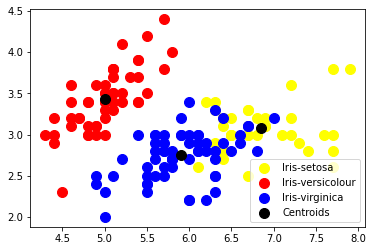

In [12]:
# We will use scatter plotting for each clusters of different colors for better representation 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

# Conclusion

The optimum number of clusters are 3 and are represented visually above.